In [13]:
#CHOSEN TRADING STRATEGY
#CCI CORRECTION

In [14]:
# Commodity Channel Index Python Code
# Load the necessary packages and modules
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime

In [15]:
#Importing data of YESB
data=pd.read_csv(r"F:\Important stuff\YESB Historical Data (2).csv")
data.head()
data['Close']=data['Price']
data.drop('Price',axis=1,inplace=True)
data.head()

,Date,Open,High,Low,Vol.,Change %,Close
0,"Jan 01, 2015",154.40,155.6,153.30,633.48K,-0.03%,154.53
1,"Jan 02, 2015",154.98,159.6,154.60,1.26M,2.60%,158.55
2,"Jan 05, 2015",159.80,160.9,157.96,1.26M,0.33%,159.08
3,"Jan 06, 2015",158.00,158.0,153.67,1.58M,-2.98%,154.34
4,"Jan 07, 2015",154.40,155.3,150.97,1.54M,-1.82%,151.53


In [16]:
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std()),
 name = 'CCI') 
 data = data.join(CCI) 
 return data

# Compute the Commodity Channel Index(CCI) for YESBANK based on the 50-day Moving average and 20-day Moving average
n = 50
YESB_data = CCI(data, n)
CCI1 = YESB_data['CCI']
YESB_data2=CCI(data,20)
CCI2 = YESB_data2['CCI']

In [ ]:
#To ensure data starts from 1st April

In [17]:
YESB_data1=YESB_data[62:]

In [18]:
YESB_data2=YESB_data2[62:]
CCI2=CCI2[62:]
CCI1=CCI1[62:]

In [ ]:
#Two data sets for different CCI values(50 day and 20 day CCI)
#YESB_data1 contains 50 day CCI
#YESB_data2 contains 20 day CCI

In [19]:
YESB_data1.head()

,Date,Open,High,Low,Vol.,Change %,Close,CCI
62,"Apr 01, 2015",162.8,170.56,161.80,1.69M,3.73%,169.40,11.806847
63,"Apr 06, 2015",169.5,171.40,168.30,1.30M,-0.14%,169.16,43.678545
64,"Apr 07, 2015",169.6,170.40,167.25,1.20M,-0.54%,168.24,31.765385
65,"Apr 08, 2015",167.6,168.62,163.79,2.41M,-2.46%,164.10,-9.446423
66,"Apr 09, 2015",164.9,168.98,164.19,1.70M,2.67%,168.48,16.461188


In [20]:
YESB_data2.head()

,Date,Open,High,Low,Vol.,Change %,Close,CCI
62,"Apr 01, 2015",162.8,170.56,161.80,1.69M,3.73%,169.40,31.126471
63,"Apr 06, 2015",169.5,171.40,168.30,1.30M,-0.14%,169.16,100.282928
64,"Apr 07, 2015",169.6,170.40,167.25,1.20M,-0.54%,168.24,85.744567
65,"Apr 08, 2015",167.6,168.62,163.79,2.41M,-2.46%,164.10,6.393543
66,"Apr 09, 2015",164.9,168.98,164.19,1.70M,2.67%,168.48,48.672082


In [21]:
YESB_data1['Date']=pd.to_datetime(YESB_data1['Date'], format='%b %d, %Y')
YESB_data2['Date']=pd.to_datetime(YESB_data2['Date'], format='%b %d, %Y')

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Plot of closing price of stock vs date  

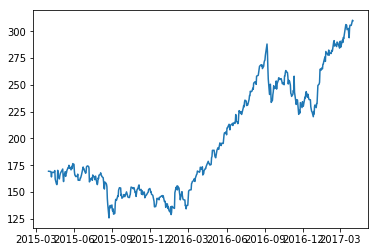

In [95]:
plt.plot(YESB_data1['Date'],YESB_data1['Close'])

In [22]:
#Plot of CCI1(50 day CCI vs date)

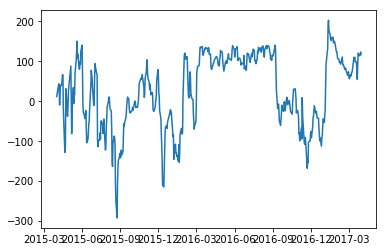

In [23]:
plt.plot(YESB_data1['Date'],CCI1)

In [24]:
#Plot of CCI2(20 day CCI vs date)

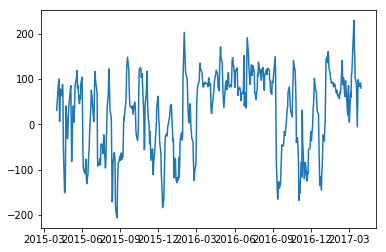

In [25]:
plt.plot(YESB_data2['Date'],CCI2)

In [26]:
#short term trading time frame and long term trading time frame

In [27]:
#CCI TRADING BIAS CREATED BY 50 day CCI
#CCI TRADING SIGNALS CREATED BY 10 day CCI

In [28]:
# MAIN ALGORITHM
# CONSIDER 50 day periods 
# BEARISH AND BULLISH TRADING BIAS IS GAUGED BY CCI

In [29]:
# IF THE BIAS IS BULLISH
#LOOK FOR BUY SIGNALS
#IF BIAS IS BEARISH 
#LOOK FOR SELL SIGNALS

In [30]:
#SELL SIGNAL(BEARISH BIAS)
#A surge above +100 and then a move below the zero line for the 20 day cci

In [31]:
import numpy as np

In [32]:
#initialize two arrays say a1 and b1
#a1 stores value of index(starting from 62) which stores points where CCI(50 day) is greater than 100
#b1 stores value of index(starting from 62) which stores points where CCI(50 day) is less than -100  

In [33]:
a1=np.array([])
b1=np.array([])

In [106]:
for i in range(62,556):
    if CCI1[i]>100:
        a1=np.append(a1,i)
    if CCI1[i]<-100:
        b1=np.append(b1,i)


In [107]:
a1

array([ 91.,  92.,  93.,  94.,  95., 100., 101., 209., 268., 269., 270.,
       271., 272., 273., 294., 295., 296., 297., 298., 299., 300., 301.,
       302., 303., 304., 305., 306., 307., 308., 309., 310., 317., 318.,
       319., 320., 323., 324., 325., 326., 327., 328., 335., 337., 338.,
       339., 340., 341., 342., 343., 344., 345., 346., 347., 348., 349.,
       350., 351., 352., 353., 354., 355., 356., 357., 358., 359., 365.,
       371., 372., 373., 374., 376., 377., 378., 379., 380., 381., 382.,
       383., 386., 387., 388., 389., 390., 391., 392., 393., 394., 395.,
       396., 397., 398., 399., 400., 401., 402., 403., 404., 405., 406.,
       407., 408., 409., 410., 411., 412., 413., 414., 415., 416., 500.,
       501., 502., 503., 504., 505., 506., 507., 508., 509., 510., 511.,
       512., 513., 514., 515., 516., 517., 518., 519., 524., 525., 543.,
       544., 545., 551., 552., 553., 554., 555.])

In [108]:
b1

array([ 72.,  73.,  74., 110., 129., 141., 142., 153., 154., 155., 158.,
       159., 160., 161., 162., 163., 164., 165., 166., 167., 168., 169.,
       170., 171., 232., 233., 234., 235., 236., 237., 252., 253., 254.,
       255., 256., 257., 258., 259., 260., 261., 262., 461., 462., 465.,
       466., 467., 468., 469., 490.])

In [110]:
#Our initial phase is bearish
#Below contains intervals of inflexion i.e where bearish become bullish alternatively

In [111]:
interval=np.array([62,91,110,209,232,268,461,500,555])

In [34]:
#Selling and Buying points are decide by 20 day CCI i.e CCI2
#A bearish bias or bullish bias is derived using 50 day CCI i.e CCI1
#Bearish bias gives sell signals and Bullish bias gives buy signals
#Sell and Buy array points are decieded by 20 day CCI i.e. CCI2 after trading bias is known
#i.e Bullish->buy
#i.e Bearish->sell 

In [35]:
sell=np.array([])
buy=np.array([])

In [36]:
for i in range(62,91):
    if CCI2[i]<=0:
        for j in range(62,i):
            if CCI2[j]>=100:
                sell=np.append(sell,i)
        break       
            

In [37]:
for i in range(91,110):
    if CCI2[i]>=0:
        for j in range(91,i):
            if CCI2[j]<=-100:
                buy=np.append(buy,i)
        break       

In [38]:
for i in range(110,209):
    if CCI2[i]<=0:
        for j in range(110,i):
            if CCI2[j]>=100:
                sell=np.append(sell,i)
                
        break

In [39]:
for i in range(209,232):
    if CCI2[i]>=0:
        for j in range(209,i):
            if CCI2[j]<=-100:
                buy=np.append(buy,i)
                break
        break

In [40]:
for i in range(232,268):
    if CCI2[i]<=0:
        for j in range(232,i):
                if CCI2[j]>=100:
                    sell=np.append(sell,i)
                break
        break

In [41]:
for i in range(268,461):
    if CCI2[i]>=0:
        for j in range(268,461):
            if CCI2[j]<=-100:
                buy=np.append(buy,i)
                break
        break

In [42]:
for i in range(461,500):
    if CCI2[i]<=0:
        for j in range(461,500):
            if CCI2[j]>=100:
                sell=np.append(sell,i)
                break
        break

In [43]:
for i in range(500,556):
    if CCI2[i]>=0:
        for j in range(500,556):
            if CCI2[j]<=-100:
                buy=np.append(buy,i)
                break
        break


In [ ]:
#Final buy signals are recorded on the following indices

In [44]:
buy

array([268.])

In [ ]:
#Final sell signals are recorded on the following indices

In [45]:
sell

array([ 71., 461.])

In [123]:
# Net gain or profit considering we have stock on 1st April

In [ ]:
#Intial portfolio value is zero

In [47]:
Profit1=YESB_data1.Close[71]-YESB_data1.Close[62]+YESB_data1.Close[461]-YESB_data1.Close[268]

In [48]:
y1=YESB_data1.Close[71]-YESB_data1.Close[62]
y2=YESB_data1.Close[461]-YESB_data1.Close[268]

In [49]:
YESB_data_plot=np.array([])

In [50]:
for i in range(0,9):
    YESB_data_plot=np.append(YESB_data_plot,0)
for i in range(9,206):
    YESB_data_plot=np.append(YESB_data_plot,y1)
for i in range(206,399):
    YESB_data_plot=np.append(YESB_data_plot,(YESB_data1.Close[i+62]+y1-YESB_data1.Close[268]))
for i in range(399,495):
    YESB_data_plot=np.append(YESB_data_plot,y1+y2)

In [ ]:
#Portfolio value using CCI correction trading strategy are plotted against date

Text(0,0.5,'Value')

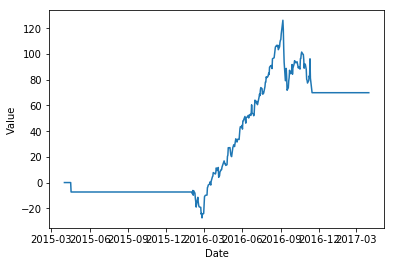

In [51]:
portfolio_value=plt.plot(YESB_data1['Date'],YESB_data_plot)
plt.xlabel('Date')
plt.ylabel('Value')

In [ ]:
#Modified Trading Strategy 
#Extra parameters used as a constraint:
#YESB_per : Difference between current stock price and 50 day moving average of stock price

In [57]:
YESB_mean=data['Close'].rolling(50).mean()

In [58]:
YESB_mean=YESB_mean[62:]

In [59]:
YESB_per=((YESB_data1['Close']-YESB_mean)/(YESB_data1['Close']))*1000


In [ ]:
#YESB_per values are plotted against Date

Text(0,0.5,'Value')

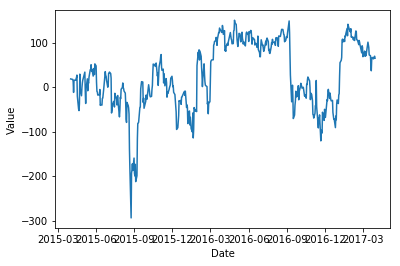

In [60]:
plt.plot(YESB_data1['Date'],YESB_per)
plt.xlabel('Date')
plt.ylabel('Value')

In [ ]:
#Modified selling points and buying points are recorded in following array

In [66]:
selld=np.array([])
buyd=np.array([])

In [67]:
#Modified Trading Strategy implementation

In [68]:
for i in range(62,91):
   
    if YESB_per[i]<=-30 and YESB_data2['CCI'][i]>=30:
        buyd=np.append(buyd,i)
        break
    

In [69]:
for i in range(91,110):
   
    if YESB_per[i]>=30 and YESB_data2['CCI'][i]<=30:
        selld=np.append(selld,i)
        break

In [70]:
for i in range(110,209):
   
    if YESB_per[i]<=-30 and YESB_data2['CCI'][i]>=30:
        buyd=np.append(buyd,i)
        break

In [71]:
for i in range(209,232):
  
    if YESB_per[i]>=30 and YESB_data2['CCI'][i]<=30:
        selld=np.append(selld,i)
        break

In [72]:
for i in range(232,268):
  
    if YESB_per[i]<=-30 and YESB_data2['CCI'][i]>=30:
        buyd=np.append(buyd,i)
        break

In [73]:
for i in range(268,461):
    
    if YESB_per[i]>=30 and YESB_data2['CCI'][i]<=30:
        selld=np.append(selld,i)
        break

In [74]:
for i in range(461,500):
    
    if YESB_per[i]<=-30 and YESB_data2['CCI'][i]>=30:
        buyd=np.append(buyd,i)
        break

In [75]:
buyd

array([176., 477.])

In [76]:
selld

array([211., 312.])

In [ ]:
#Final array which contains buying and selling points

In [78]:
finalarr=[62,71,176,211,268,312,477]

In [79]:
#Profit from new strategy

In [80]:
Profit2=YESB_data1.Close[71]-YESB_data1.Close[62]+YESB_data1.Close[211]-YESB_data1.Close[176]+YESB_data1.Close[312]-YESB_data1.Close[268]+YESB_data1.Close[556]-YESB_data1.Close[477]

In [81]:
x1=YESB_data1.Close[71]-YESB_data1.Close[62]
x2=YESB_data1.Close[211]-YESB_data1.Close[176]
x3=YESB_data1.Close[312]-YESB_data1.Close[268]
x4=YESB_data1.Close[556]-YESB_data1.Close[477]

In [83]:
YESB_data_plot2=np.array([])

In [84]:
for i in range(0,9):
    YESB_data_plot2=np.append(YESB_data_plot2,0)
for i in range(9,114):
    YESB_data_plot2=np.append(YESB_data_plot2,x1)
for i in range(114,149):
    YESB_data_plot2=np.append(YESB_data_plot2,(YESB_data1.Close[i+62])+x1-YESB_data1.Close[114])
for i in range(149,206):
    YESB_data_plot2=np.append(YESB_data_plot2,x2+x1)
for i in range(206,250):
    YESB_data_plot2=np.append(YESB_data_plot2,YESB_data.Close[i+62]+x1+x2-YESB_data1.Close[206])
for i in range(250,415):
    YESB_data_plot2=np.append(YESB_data_plot2,x1+x2+x3)
for i in range(415,495):
    YESB_data_plot2=np.append(YESB_data_plot2,YESB_data.Close[i+62]+x1+x2+x3-YESB_data1.Close[477])

In [ ]:
#New portfolio value ploted against Date

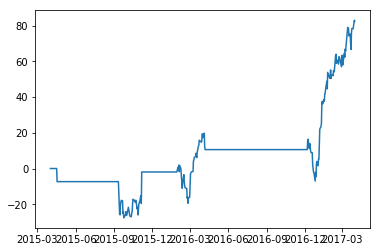

In [85]:
plt.plot(YESB_data1['Date'],YESB_data_plot2)

In [ ]:
# Profit due to new trading startegy

In [86]:
Profit2

82.47999999999996

In [87]:
#initial portfolio value = 0 
#1 stock of yes bank is assumed to be bought before start of period

In [88]:
mean=YESB_data_plot.mean()

In [90]:
#Table for strategy 1 i.e total returns vs deviation

In [91]:
Table_deviation=pd.DataFrame({'total_returns': YESB_data_plot,
              'deviation':YESB_data_plot-mean
             })

In [92]:
mean2=YESB_data_plot2.mean()

In [93]:
#Table for strategy 2 i.e total returns vs deviation

In [94]:
Table_deviation2=pd.DataFrame({'total_returns': YESB_data_plot2,
              'deviation':YESB_data_plot2-mean2
             })

In [95]:
Table_deviation2

,total_returns,deviation
0,0.00,-7.305091
1,0.00,-7.305091
2,0.00,-7.305091
3,0.00,-7.305091
4,0.00,-7.305091
5,0.00,-7.305091
6,0.00,-7.305091
7,0.00,-7.305091
8,0.00,-7.305091
9,-7.35,-14.655091


In [ ]:
#Bar graph showing returns due to both strategies
#Left one is CCI correction
#Right one is CCI correction (modified)

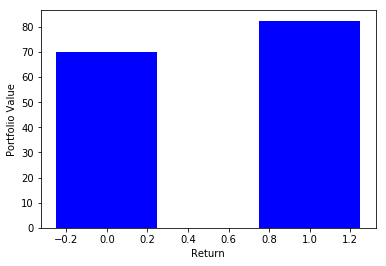

In [180]:
data=[Profit1,Profit2]
X = np.arange(2)
plt.bar(X + 0.00, data, color = 'b', width = 0.5)
plt.xlabel('Return')
plt.ylabel('Portfolio Value')
plt.show()